In [1]:
import tensorflow_hub as hub
import tensorflow as tf
from matplotlib import pyplot as plt
import numpy as np
import cv2

In [33]:
path = 'C:/Users/smart/Documents/Computer Vision/Neural Style Transfer/lite-model_cartoongan_dr_1.tflite'

In [35]:
interpreter = tf.lite.Interpreter(path)
interpreter.allocate_tensors()

ValueError: Didn't find op for builtin opcode 'DEPTHWISE_CONV_2D' version '6'
Registration failed.


In [23]:
model = hub.load('https://tfhub.dev/google/magenta/arbitrary-image-stylization-v1-256/2') #https://tfhub.dev/sayakpaul/lite-model/cartoongan/dr/1
#model = hub.load('https://tfhub.dev/sayakpaul/lite-model/cartoongan/dr/1')
#model = hub.load('https://tfhub.dev/sayakpaul/lite-model/boundless-quarter/dr/1')
#model = hub.load('https://tfhub.dev/sayakpaul/lite-model/arbitrary-image-stylization-inceptionv3/dr/predict/1')


In [3]:
def load_image(img_path):
    img = tf.io.read_file(img_path)
    img = tf.image.decode_image(img, channels=3)
    img = tf.image.convert_image_dtype(img, tf.float32)
    img = img[tf.newaxis, :]
    return img

In [9]:
content_image = load_image('sherif.jfif')
style_image = load_image('build.jpg')

In [10]:
content_image.shape

TensorShape([1, 400, 400, 3])

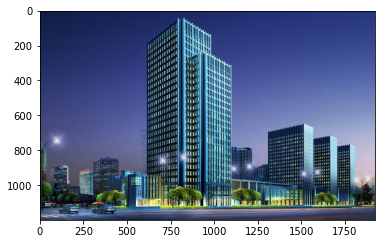

In [11]:
plt.imshow(np.squeeze(style_image))
plt.show()

In [12]:
stylized_image = model(tf.constant(content_image), tf.constant(style_image))[0]

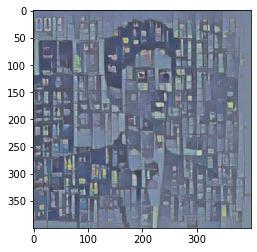

In [13]:
plt.imshow(np.squeeze(stylized_image))
plt.show()

In [49]:
import cv2
import numpy as np
import tensorflow as tf 
import matplotlib.pyplot as plt

def cartoonize(image_path):
    interpreter = tf.lite.Interpreter(model_path="cartoon_gan.tflite")
    interpreter.allocate_tensors()
    
    input_details = interpreter.get_input_details()
    output_details = interpreter.get_output_details()

    input_shape = input_details[0]['shape']
    image = cv2.imread(image_path)
    image = cv2.resize(image, (256, 256),
						interpolation=cv2.INTER_CUBIC)
    image = image.astype(np.float32)/127.5 - 1
    image = image.reshape(input_shape)
    
    interpreter.set_tensor(input_details[0]['index'], image)

    interpreter.invoke()
    output = interpreter.get_tensor(output_details[0]['index'])
    output = (np.squeeze(output)+1)*127.5
    output = np.clip(output, 0, 255)
    
    cv2.imwrite('cartoon_image.jpg', output)


if __name__ == '__main__':
	image_path = 'C:/Users/smart/Documents/Computer Vision/Neural Style Transfer/sherif.jfif'
	img = cartoonize(image_path)
    

In [51]:
img = cv2.imread('cartoon_image.jpg')
cv2.imshow('img', img)
cv2.waitKey(0)

13